In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_pickle("../data/user_review.pkl")
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Date           594 non-null    datetime64[ns, UTC]
 1   Business Name  594 non-null    object             
 2   Rating         594 non-null    float64            
 3   Comment        594 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 18.7+ KB


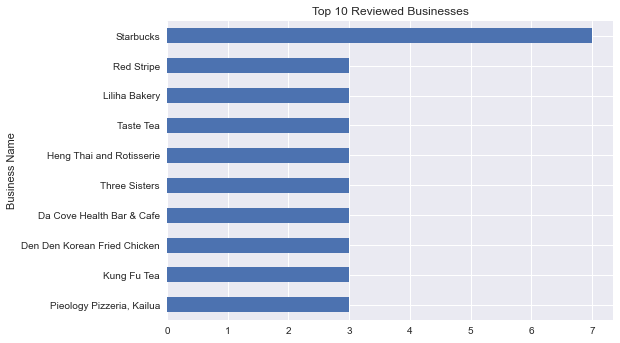

In [3]:
matplotlib.style.use('seaborn')
barplot = reviews.groupby("Business Name").size().sort_values(ascending=False)[0:10][::-1].plot(kind='barh', title="Top 10 Reviewed Businesses")

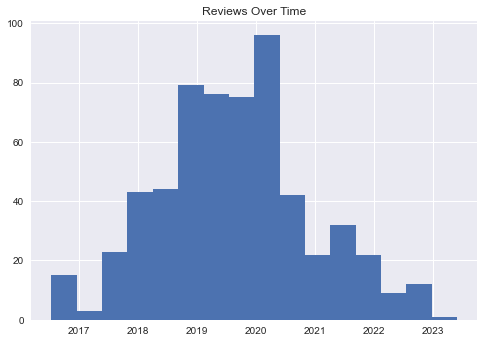

In [4]:
plt.hist(reviews["Date"], bins=16)
plt.title("Reviews Over Time")
plt.show()

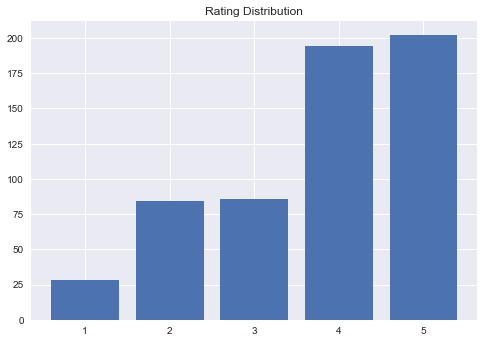

In [5]:
plt.bar([1,2,3,4,5], reviews.groupby("Rating").size())
plt.title("Rating Distribution")
plt.show()

In [6]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

In [7]:
# Function to generate a wordcloud from a chosen review
# Source: https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214
stop_words = set(stopwords.words('english'))
def get_wordcloud(review):
    word_tokens = word_tokenize(review)
    filtered_sentence = [word.lower() for word in word_tokens if word not in stop_words]
    sentence = ' '.join(filtered_sentence)
    wordcloud = WordCloud(width=500, 
                          height=300, 
                          max_words=100, 
                          stopwords=stop_words, 
                          colormap='Blues').generate_from_text(sentence)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

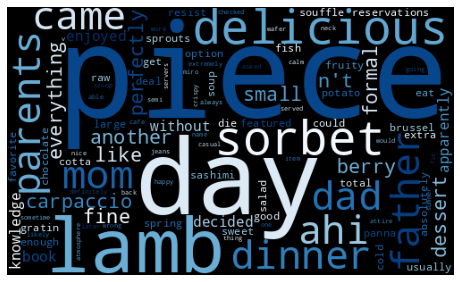

In [8]:
# Generate word cloud on a random review
get_wordcloud(reviews["Comment"][100])

In [9]:
import plotly.express as px
reviews_geo = pd.read_pickle("../data/reviews_geocoded.pkl")

In [10]:
fig = px.scatter_mapbox(reviews_geo, 
                        lat = reviews_geo["Latitude"], 
                        lon = reviews_geo["Longitude"], 
                        hover_name = "Business Name", 
                        hover_data = {"Rating":True, "Latitude":False, "Longitude":False},
                        zoom = 2, 
                        height = 600,
                        width = 800)
#fig.update_layout(mapbox_style = "open-street-map")
#fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
#fig.show()